In [2]:
import opendatasets as od
import pandas as pd
 
od.download('https://www.kaggle.com/competitions/digit-recognizer/data')

Skipping, found downloaded files in ".\digit-recognizer" (use force=True to force download)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, InputLayer
from keras.optimizers import Adam

In [4]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

# use cpu instead of gpu
# import os
# os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [13]:
from sklearn.model_selection import train_test_split
df = pd.read_csv('digit-recognizer/train.csv')
x, y = df.drop('label', axis=1), df['label']
train_X, test_X, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=2)

In [14]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
train_y = enc.fit_transform(train_y.values.reshape(-1,1)).toarray()[:100]
train_X = train_X.values.reshape(-1,28,28,1)[:100]

NameError: name 'enc' is not defined

ValueError: 1 is not in list

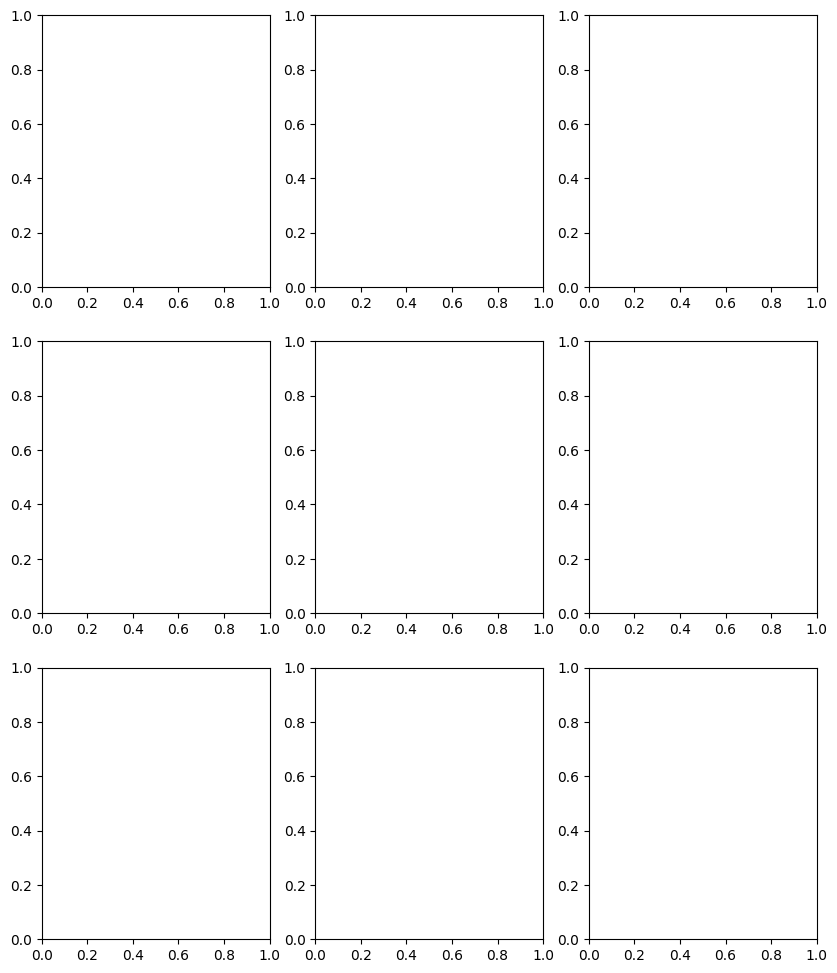

In [12]:
fig, ax = plt.subplots(3,3,figsize=(10,12))
for i in range(3):
    for j in range(3):
        img = train_X[3*i+j]
        label = train_X[3*i+j].tolist().index(1)
        ax[i][j].imshow(img)
        ax[i][j].set_title(label)
        ax[i][j].axis('off')

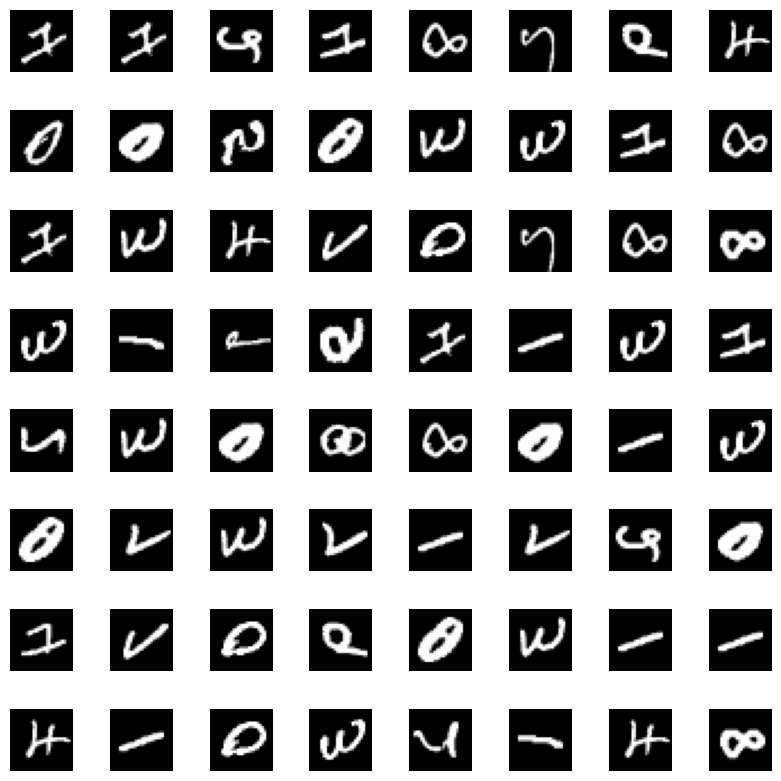

In [10]:
m, n = train_X.shape[1:3]

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices
    X_random_reshaped = train_X[random_index].reshape((28,28)).T
    
    # Display the image and label
    ax.imshow(X_random_reshaped, cmap='gray')
    # ax.set_title(train_y[random_index])
    ax.set_axis_off()

In [ ]:
train_X.shape

(100, 28, 28, 1)

In [ ]:
train_y.shape

(100, 10)

In [ ]:
model = Sequential([
    # InputLayer(input_shape=(28,28,1)),

    Conv2D(32, 3, activation='relu', input_shape = (28,28,1)),
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(3),
    
    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [ ]:
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), #spars - y can only take one from 10 values
    optimizer=tf.keras.optimizers.Adam(0.001),          #logists - Z function 
    metrics=['accuracy']
)

history = model.fit(
    train_X,train_y,
    epochs=5,
)

Epoch 1/5


c:\Program Files\Python310\lib\site-packages\keras\backend.py:5531: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


: 

: 